In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch as t


In [67]:
df = pd.read_csv("train.csv")
df["message_timestamp"] = pd.to_datetime(df["message_timestamp"])
df.head()


,physical_part_type,message_timestamp,weekday,shift,status,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,...,s8_sensor119_millimeter_step1,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1
0,type1,2024-09-01 22:05:44,Sunday,Nachtschicht,OK,gAAAAABnRuZgg4Kol8URwnouW9Hv5RymnFqydE_5oyUU_3...,4606.469076,19.525688,374.198570,8858.706709,...,116.978698,25845.838372,NaN,210.307587,158.979496,35265.817888,217.244319,0.0,727.488871,28.207390
1,type2,2024-09-01 22:07:29,Sunday,Nachtschicht,OK,gAAAAABnRuZfvjtCL7qj_QEGC47fSq-n7brsZXoEV--vJ1...,5886.043819,17.540378,360.603884,8851.987083,...,133.967306,NaN,NaN,204.013170,157.362755,34114.280978,225.185946,0.0,741.645333,25.441928
2,type1,2024-09-01 22:07:55,Sunday,Nachtschicht,OK,gAAAAABnRuZfuXBrn_3FsgN6QXP6DQZPeVgP17o6yPbv4h...,4606.469076,20.445584,371.689206,8856.466834,...,155.401053,25845.838372,NaN,184.667093,NaN,35049.904717,223.404646,0.0,721.249812,25.441928
3,type1,2024-09-01 22:08:38,Sunday,Nachtschicht,OK,gAAAAABnRuZheONxFxB3r6dyfTZt1ehdUXm6a-9Opa35i4...,4606.469076,20.822377,372.461318,8854.226959,...,108.880369,25845.838372,NaN,195.774888,NaN,33682.454636,219.470943,0.0,716.725583,26.253564
4,type1,2024-09-01 22:08:56,Sunday,Nachtschicht,OK,gAAAAABnRuZiqnRUJiO7HqQmkkVmg-m21um0EcSExrMdud...,4606.469076,18.592800,373.371307,8851.987083,...,115.292611,25845.838372,NaN,174.577513,154.129274,34546.107319,240.178550,0.0,775.029771,21.271151


In [68]:
for c in df.columns:
    if "sensor" not in c:
        print(f"Column: {c}")
        col = df[c]
        unique = col.unique()
        print(f"Unique: {len(unique)} | NaN: {col.isna().sum()} | Total: {len(col)}")
        try:
            print(f"Min: {col.min()} | Max: {col.max()}")
        except:
            pass
        print(f"Unique values:")
        print(unique[:7])
        print()


Column: physical_part_type
Unique: 4 | NaN: 2 | Total: 44818
Unique values:
['type1' 'type2' 'type4' nan]

Column: message_timestamp
Unique: 44818 | NaN: 0 | Total: 44818
Min: 2024-09-01 22:05:44 | Max: 2024-11-25 00:57:50
Unique values:
<DatetimeArray>
['2024-09-01 22:05:44', '2024-09-01 22:07:29', '2024-09-01 22:07:55',
 '2024-09-01 22:08:38', '2024-09-01 22:08:56', '2024-09-01 22:09:23',
 '2024-09-01 22:09:40']
Length: 7, dtype: datetime64[ns]

Column: weekday
Unique: 6 | NaN: 0 | Total: 44818
Min: Friday | Max: Wednesday
Unique values:
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']

Column: shift
Unique: 3 | NaN: 0 | Total: 44818
Min: Fruehschicht | Max: Spaetschicht
Unique values:
['Nachtschicht' 'Fruehschicht' 'Spaetschicht']

Column: status
Unique: 2 | NaN: 0 | Total: 44818
Min: NOK | Max: OK
Unique values:
['OK' 'NOK']

Column: physical_part_id
Unique: 44818 | NaN: 0 | Total: 44818
Min: gAAAAABnRuZf--ISzNDP3gKLjPqOPt5FdWGvtLzT6ViconXLBkRz8ILivoDxo7b9iYDEHJkSUqKpn

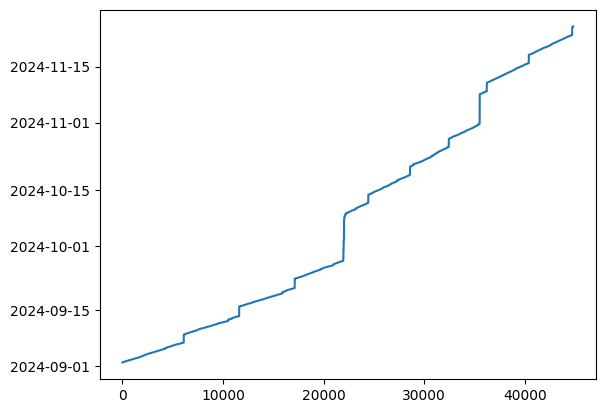


Large time gap found:
       message_timestamp         shift weekday
6093 2024-09-06 21:46:07  Spaetschicht  Friday
6094 2024-09-08 21:57:04  Nachtschicht  Sunday
Time difference: 173457.0 seconds

Large time gap found:
        message_timestamp         shift weekday
11603 2024-09-13 13:00:06  Fruehschicht  Friday
11604 2024-09-15 22:09:02  Nachtschicht  Sunday
Time difference: 205736.0 seconds

Large time gap found:
        message_timestamp         shift weekday
17121 2024-09-20 13:12:55  Fruehschicht  Friday
17122 2024-09-22 21:57:05  Nachtschicht  Sunday
Time difference: 204250.0 seconds

Large time gap found:
        message_timestamp         shift weekday
21960 2024-09-27 12:45:28  Fruehschicht  Friday
21961 2024-09-30 07:35:58  Fruehschicht  Monday
Time difference: 240630.0 seconds

Large time gap found:
        message_timestamp         shift    weekday
21986 2024-09-30 10:53:06  Fruehschicht     Monday
21987 2024-10-02 07:27:40  Fruehschicht  Wednesday
Time difference: 160474

In [69]:
plt.plot(df["message_timestamp"].sort_values().to_numpy())
plt.show()

# Calculate time differences between consecutive rows
time_diffs = df["message_timestamp"].diff().dt.total_seconds()

# Find indices where time diff > 1000 seconds
large_gaps = time_diffs[time_diffs > 50000].index

# Show rows with large gaps and their previous rows
for idx in large_gaps:
    print("\nLarge time gap found:")
    print(df.iloc[idx - 1 : idx + 1][["message_timestamp", "shift", "weekday"]])
    print(f"Time difference: {time_diffs[idx]:.1f} seconds")


In [71]:
names = []
unique_counts = []
for c in df.columns:
    if "sensor" not in c:
        continue
    sensor_number = int(c.split("_")[1].replace("sensor", ""))
    station_number = int(c.split("_")[0].replace("s", ""))
    names.append((station_number, sensor_number, c))

for c in sorted(names):
    col = df[c[2]]
    unique = col.unique()
    print(c)
    print(f"Unique: {len(unique)} | NaN: {col.isna().sum()} | Total: {len(col)}")
    print(unique[:7])
    print()
    unique_counts.append(len(unique))


(0, 0, 's0_sensor0_kilonewton_step3')
Unique: 2 | NaN: 27565 | Total: 44818
[         nan -53.53724329]

(0, 1, 's0_sensor1_millimeter_step1')
Unique: 69 | NaN: 27565 | Total: 44818
[          nan 8532.12091259 8528.17136452 8525.53833248 8527.73252585
 8526.41600983 8527.51310651]

(0, 2, 's0_sensor2_millimeter_step1')
Unique: 5 | NaN: 1364 | Total: 44818
[25178.80726414 26579.1819816             nan 23781.92475295
 25143.88520136]

(0, 3, 's0_sensor3_kilonewton_step1')
Unique: 2 | NaN: 27565 | Total: 44818
[         nan 765.80468731]

(0, 4, 's0_sensor4_kilonewton_step1')
Unique: 25 | NaN: 1365 | Total: 44818
[60.12528862 60.40624791 59.93798242 60.21894172 60.03163552 60.49990101
 60.59355411]

(0, 5, 's0_sensor5_millimeter_step1')
Unique: 5 | NaN: 1364 | Total: 44818
[26243.57387391 27707.227994              nan 24783.5697641
 24820.06986684]

(0, 6, 's0_sensor6_kilonewton_step3')
Unique: 2 | NaN: 27565 | Total: 44818
[        nan 45.73407548]

(0, 7, 's0_sensor7_kilonewton_step3')

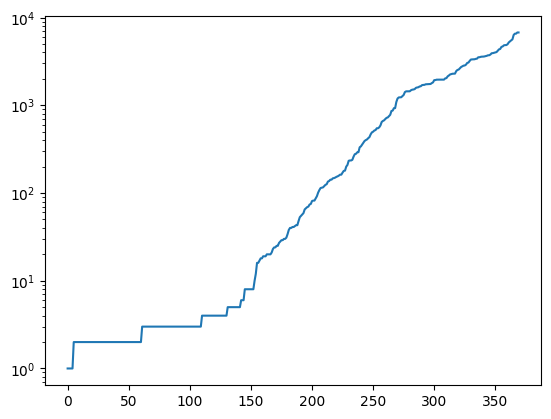

In [75]:
plt.plot(sorted(unique_counts))
plt.yscale("log")
plt.show()
